# Performance & Efficiency Analysis

*   Jacob Yousif

## Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%capture
!pip install adjustText

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.spatial import ConvexHull
from adjustText import adjust_text

## Process

In [7]:
df_rf = pd.read_csv("results/RandomForestHypertuningProgress.csv")

In [8]:
df_tabnet = pd.read_csv("results/TabNetHypertuningProgress.csv")

In [9]:
df_xgb = pd.read_csv("results/XGBoostHypertuningProgress.csv")

In [10]:
best_trial = df_rf.loc[df_rf['BestAccuracy'].idxmax(), 'Trial']
print("The trial nummber for the best accuracy for Random Forest is:", best_trial + 1)

The trial nummber for the best accuracy for Random Forest is: 93


In [11]:
best_trial = df_tabnet.loc[df_tabnet['BestAccuracy'].idxmax(), 'Trial']
print("The trial nummber for the best accuracy for TabNet is:", best_trial + 1)

The trial nummber for the best accuracy for TabNet is: 58


In [12]:
best_trial = df_xgb.loc[df_xgb['BestAccuracy'].idxmax(), 'Trial']
print("The trial nummber for the best accuracy for XGBoost is:", best_trial + 1)

The trial nummber for the best accuracy for XGBoost is: 66


In [13]:
df_rf.describe()

,Trial,Accuracy,Duration,BestAccuracy
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.798807,176.736570,0.815874
std,29.011492,0.030449,234.152364,0.001340
min,0.000000,0.692160,17.253826,0.810503
25%,24.750000,0.794578,66.843832,0.815501
50%,49.500000,0.812531,106.034341,0.816279
75%,74.250000,0.815470,199.559001,0.816607
max,99.000000,0.816770,1477.418456,0.816770


In [14]:
df_tabnet.describe()

,Trial,Accuracy,Duration,BestAccuracy
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.697507,366.213388,0.788937
std,29.011492,0.193458,374.424368,0.018237
min,0.000000,0.015689,65.607235,0.699779
25%,24.750000,0.732447,200.178049,0.788915
50%,49.500000,0.766877,283.417931,0.788915
75%,74.250000,0.779668,424.399964,0.798337
max,99.000000,0.798337,3221.955136,0.798337


In [15]:
df_xgb.describe()

,Trial,Accuracy,Duration,BestAccuracy
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.821151,71.178230,0.826415
std,29.011492,0.007193,50.318843,0.001923
min,0.000000,0.786621,10.001164,0.823816
25%,24.750000,0.818552,37.029573,0.823816
50%,49.500000,0.824062,59.387081,0.826602
75%,74.250000,0.825793,86.925334,0.828527
max,99.000000,0.828527,232.987717,0.828527


In [16]:
df_rf.columns

Index(['Trial', 'Accuracy', 'Duration', 'Params', 'BestAccuracy'], dtype='object')

In [17]:
df_tabnet.columns

Index(['Trial', 'Accuracy', 'Duration', 'Params', 'BestAccuracy'], dtype='object')

In [18]:
df_xgb.columns

Index(['Trial', 'Accuracy', 'Duration', 'Params', 'BestAccuracy'], dtype='object')

In [19]:
df_rf.head()

,Trial,Accuracy,Duration,Params,BestAccuracy
0,0,0.810503,261.390042,"{'n_estimators': 584, 'max_depth': 20, 'min_sa...",0.810503
1,1,0.776217,110.081856,"{'n_estimators': 402, 'max_depth': 7, 'min_sam...",0.810503
2,2,0.789530,915.791048,"{'n_estimators': 639, 'max_depth': 10, 'min_sa...",0.810503
3,3,0.725668,351.645198,"{'n_estimators': 804, 'max_depth': 5, 'min_sam...",0.810503
4,4,0.809110,127.856913,"{'n_estimators': 845, 'max_depth': 20, 'min_sa...",0.810503


In [20]:
df_tabnet.head()

,Trial,Accuracy,Duration,Params,BestAccuracy
0,0,0.699779,1164.941859,"{'n_d': 57, 'n_a': 8, 'n_steps': 8, 'gamma': 1...",0.699779
1,1,0.063370,656.640581,"{'n_d': 56, 'n_a': 12, 'n_steps': 6, 'gamma': ...",0.699779
2,2,0.710470,970.407148,"{'n_d': 38, 'n_a': 15, 'n_steps': 9, 'gamma': ...",0.710470
3,3,0.115599,624.492740,"{'n_d': 60, 'n_a': 13, 'n_steps': 10, 'gamma':...",0.710470
4,4,0.772284,491.625834,"{'n_d': 14, 'n_a': 8, 'n_steps': 10, 'gamma': ...",0.772284


In [21]:
df_xgb.head()

,Trial,Accuracy,Duration,Params,BestAccuracy
0,0,0.823816,68.174362,"{'n_estimators': 389, 'eta': 0.291893766171394...",0.823816
1,1,0.811855,19.375737,"{'n_estimators': 977, 'eta': 0.735599089954287...",0.823816
2,2,0.817876,27.915541,"{'n_estimators': 790, 'eta': 0.672134526968142...",0.823816
3,3,0.816934,109.768275,"{'n_estimators': 317, 'eta': 0.140351635071733...",0.823816
4,4,0.812551,79.306950,"{'n_estimators': 467, 'eta': 0.075578226052075...",0.823816


In [22]:
df_rf.tail()

,Trial,Accuracy,Duration,Params,BestAccuracy
95,95,0.816648,241.622293,"{'n_estimators': 751, 'max_depth': 30, 'min_sa...",0.81677
96,96,0.815501,241.880344,"{'n_estimators': 765, 'max_depth': None, 'min_...",0.81677
97,97,0.816238,224.577547,"{'n_estimators': 712, 'max_depth': 30, 'min_sa...",0.81677
98,98,0.815787,427.113360,"{'n_estimators': 839, 'max_depth': 30, 'min_sa...",0.81677
99,99,0.695273,46.229653,"{'n_estimators': 862, 'max_depth': 3, 'min_sam...",0.81677


In [23]:
df_tabnet.tail()

,Trial,Accuracy,Duration,Params,BestAccuracy
95,95,0.779166,436.379891,"{'n_d': 59, 'n_a': 11, 'n_steps': 4, 'gamma': ...",0.798337
96,96,0.733410,224.432615,"{'n_d': 54, 'n_a': 12, 'n_steps': 3, 'gamma': ...",0.798337
97,97,0.742340,101.412442,"{'n_d': 49, 'n_a': 11, 'n_steps': 3, 'gamma': ...",0.798337
98,98,0.729559,497.075412,"{'n_d': 39, 'n_a': 11, 'n_steps': 4, 'gamma': ...",0.798337
99,99,0.787604,248.625128,"{'n_d': 56, 'n_a': 12, 'n_steps': 3, 'gamma': ...",0.798337


In [24]:
df_xgb.tail()

,Trial,Accuracy,Duration,Params,BestAccuracy
95,95,0.826315,48.837423,"{'n_estimators': 239, 'eta': 0.138872894676925...",0.828527
96,96,0.825987,73.920044,"{'n_estimators': 198, 'eta': 0.183511637048096...",0.828527
97,97,0.824635,53.022370,"{'n_estimators': 137, 'eta': 0.129404596327552...",0.828527
98,98,0.825700,31.365623,"{'n_estimators': 279, 'eta': 0.268624118473353...",0.828527
99,99,0.826397,52.295193,"{'n_estimators': 150, 'eta': 0.237708781273729...",0.828527


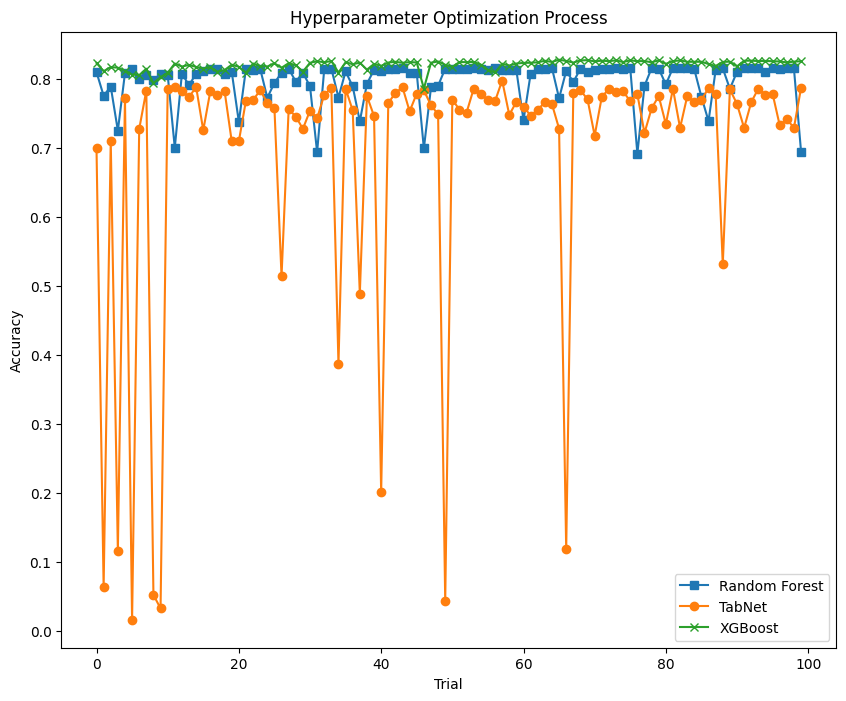

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(df_rf['Trial'], df_rf['Accuracy'], marker='s', linestyle='-', label='Random Forest')
plt.plot(df_tabnet['Trial'], df_tabnet['Accuracy'], marker='o', linestyle='-', label='TabNet')
plt.plot(df_xgb['Trial'], df_xgb['Accuracy'], marker='x', linestyle='-', label='XGBoost')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='lower right')
plt.savefig('figures/hypertuning/AccuracyOverTrialsTabNetVs.XGBoostVs.RF.pdf', bbox_inches='tight', dpi=100)
plt.show()

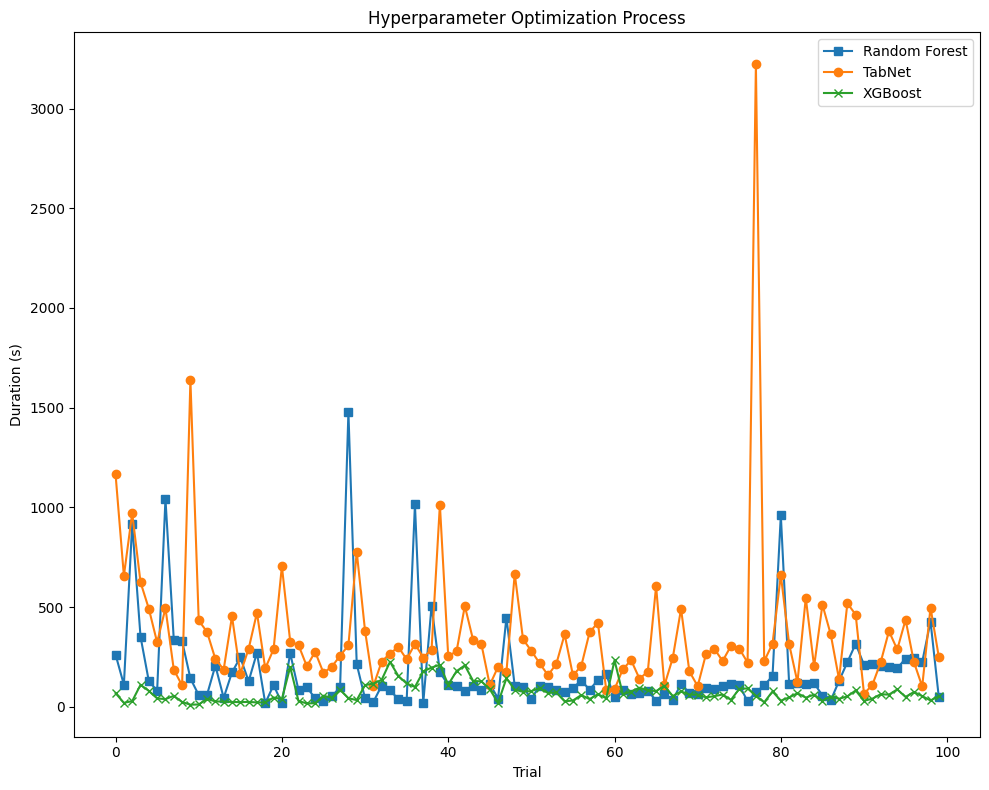

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(df_rf['Trial'], df_rf['Duration'], marker='s', linestyle='-', label='Random Forest')
plt.plot(df_tabnet['Trial'], df_tabnet['Duration'], marker='o', linestyle='-', label='TabNet')
plt.plot(df_xgb['Trial'], df_xgb['Duration'], marker='x', linestyle='-', label='XGBoost')
plt.xlabel('Trial')
plt.ylabel('Duration (s)')
plt.title('Hyperparameter Optimization Process')
plt.legend()
plt.tight_layout()
plt.savefig('figures/hypertuning/DurationOverTrialsTabNetVs.XGBoostVs.RF.pdf', bbox_inches='tight', dpi=100)
plt.show()

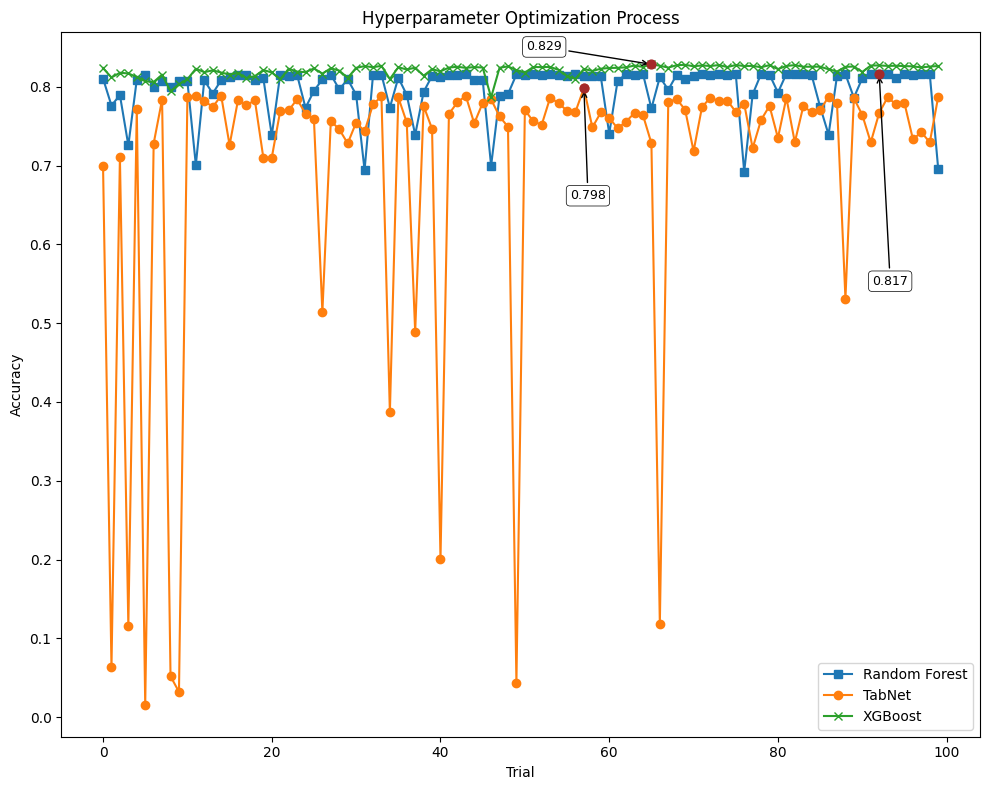

In [27]:
best_xgb = df_xgb.loc[df_xgb['Accuracy'].idxmax()]
best_xgb_trial = best_xgb['Trial']
best_xgb_accuracy = best_xgb['Accuracy']

best_tabnet = df_tabnet.loc[df_tabnet['Accuracy'].idxmax()]
best_tabnet_trial = best_tabnet['Trial']
best_tabnet_accuracy = best_tabnet['Accuracy']

best_rf = df_rf.loc[df_rf['Accuracy'].idxmax()]
best_rf_trial = best_rf['Trial']
best_rf_accuracy = best_rf['Accuracy']

plt.figure(figsize=(10, 8))
plt.plot(df_rf['Trial'], df_rf['Accuracy'], marker='s', linestyle='-', label='Random Forest')
plt.plot(df_tabnet['Trial'], df_tabnet['Accuracy'], marker='o', linestyle='-', label='TabNet')
plt.plot(df_xgb['Trial'], df_xgb['Accuracy'], marker='x', linestyle='-', label='XGBoost')

plt.scatter(best_rf_trial, best_rf_accuracy, color='brown', s=40, zorder=5)
plt.scatter(best_xgb_trial, best_xgb_accuracy, color='brown', s=40, zorder=5)
plt.scatter(best_tabnet_trial, best_tabnet_accuracy, color='brown', s=40, zorder=5)


arrow_props = dict(arrowstyle="->", connectionstyle="arc3", color='black')
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)


plt.annotate(f'{best_rf_accuracy:.3f}', 
             xy=(best_rf_trial, best_rf_accuracy),
             xytext=(-5, -152), textcoords='offset points',
             arrowprops=arrow_props,
             bbox=bbox_props,
             fontsize=9, color='black', weight='light')

plt.annotate(f'{best_xgb_accuracy:.3f}', 
             xy=(best_xgb_trial, best_xgb_accuracy),
             xytext=(-90, 10), textcoords='offset points',
             arrowprops=arrow_props,
             bbox=bbox_props,
             fontsize=9, color='black', weight='light')

plt.annotate(f'{best_tabnet_accuracy:.3f}', 
             xy=(best_tabnet_trial, best_tabnet_accuracy),
             xytext=(-10, -80), textcoords='offset points',
             arrowprops=arrow_props,
             bbox=bbox_props,
             fontsize=9, color='black', weight='light')

plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('figures/hypertuning/AccuracyOverTrialsTabNetVs.XGBoostVs.RFAnonnated.pdf', bbox_inches='tight', dpi=100)
plt.show()

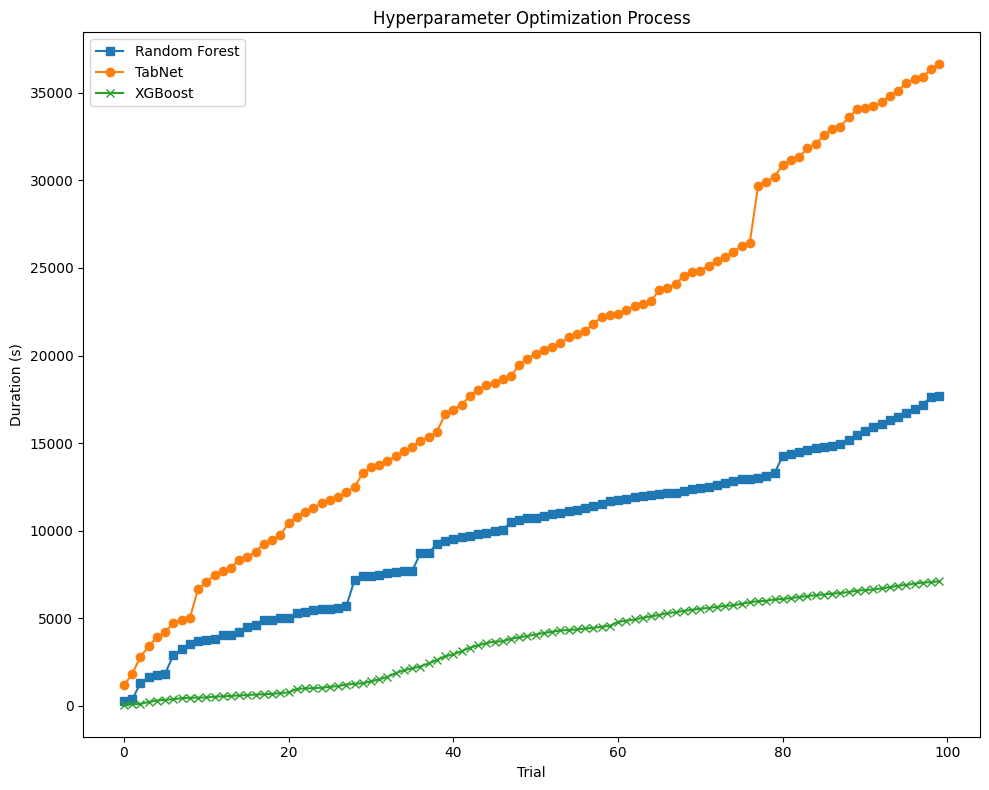

In [28]:
df_xgb['Cumulative Duration'] = df_xgb['Duration'].cumsum()
df_tabnet['Cumulative Duration'] = df_tabnet['Duration'].cumsum()
df_rf['Cumulative Duration'] = df_rf['Duration'].cumsum()
plt.figure(figsize=(10, 8))
plt.plot(df_rf['Trial'], df_rf['Cumulative Duration'], marker='s', linestyle='-', label='Random Forest')
plt.plot(df_tabnet['Trial'], df_tabnet['Cumulative Duration'], marker='o', linestyle='-', label='TabNet')
plt.plot(df_xgb['Trial'], df_xgb['Cumulative Duration'], marker='x', linestyle='-', label='XGBoost')
plt.xlabel('Trial')
plt.ylabel('Duration (s)')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures/hypertuning/CumulativeDurationOverTrialsTabNetVs.XGBoostVsRF.pdf', bbox_inches='tight', dpi=100)
plt.show()

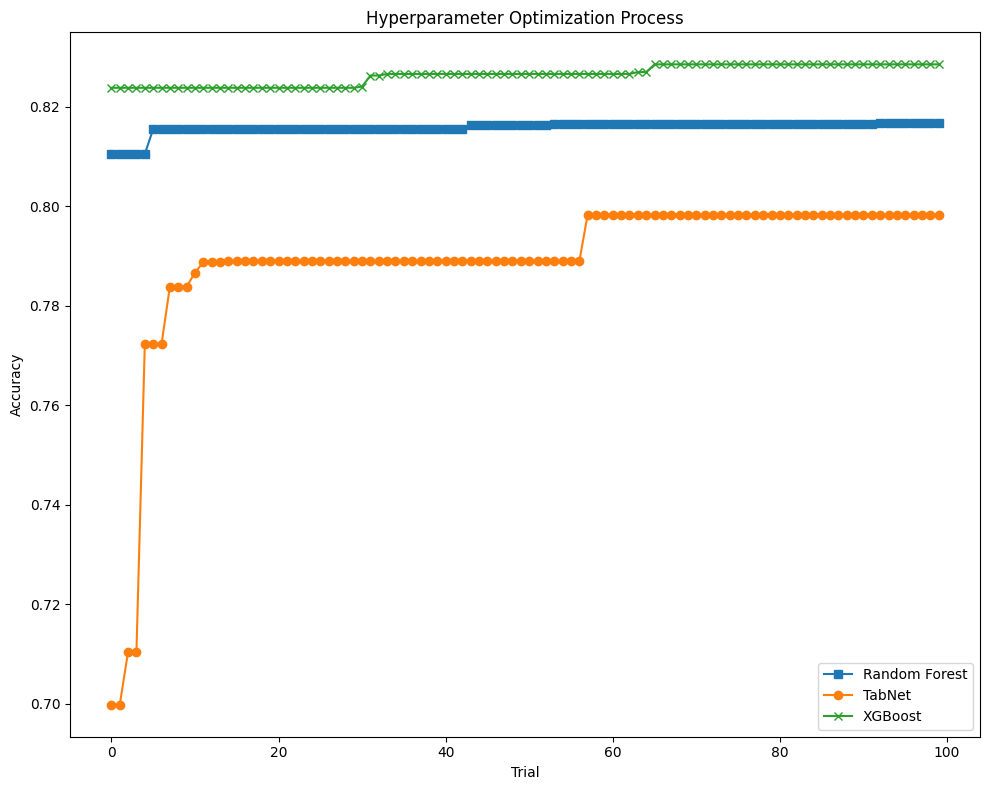

In [29]:
df_xgb['Best So Far'] = df_xgb['Accuracy'].cummax()
df_tabnet['Best So Far'] = df_tabnet['Accuracy'].cummax()
df_rf['Best So Far'] = df_rf['Accuracy'].cummax()
plt.figure(figsize=(10, 8))
plt.plot(df_rf['Trial'], df_rf['Best So Far'], marker='s', linestyle='-', label='Random Forest')
plt.plot(df_tabnet['Trial'], df_tabnet['Best So Far'], marker='o', linestyle='-', label='TabNet')
plt.plot(df_xgb['Trial'], df_xgb['Best So Far'], marker='x', linestyle='-', label='XGBoost')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('figures/hypertuning/AllConvergenceAnalysisAccuracyProgressOverTrials.pdf', bbox_inches='tight', dpi=100)
plt.show()

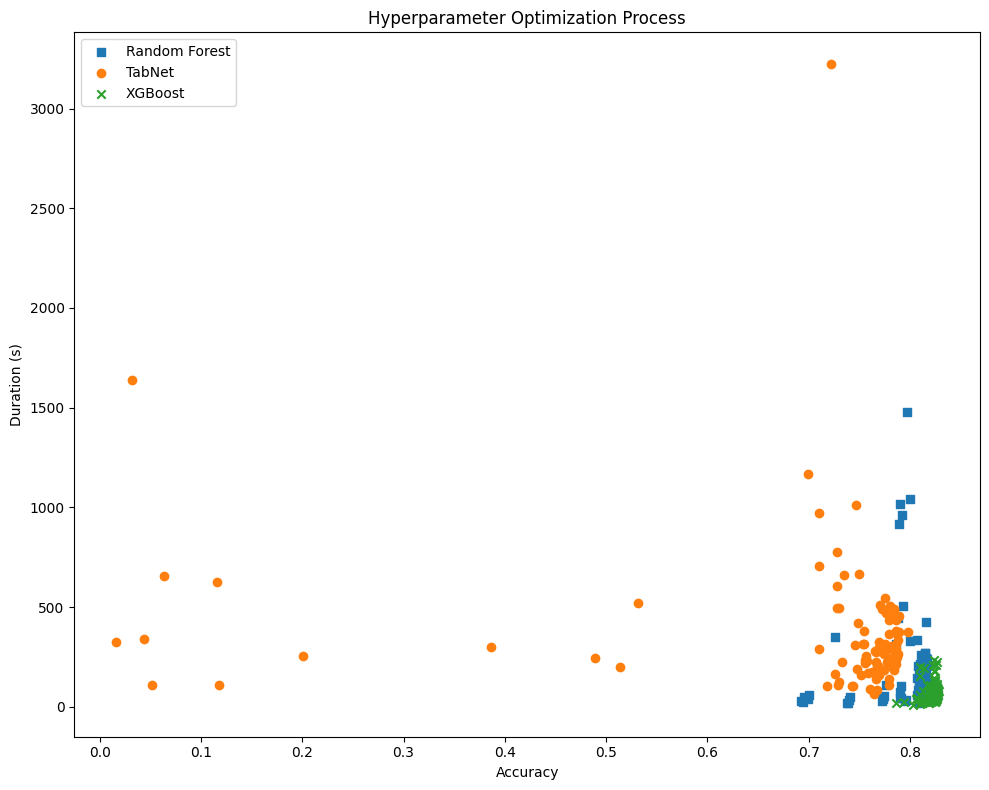

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(df_rf['Accuracy'], df_rf['Duration'], label='Random Forest', marker='s')
plt.scatter(df_tabnet['Accuracy'], df_tabnet['Duration'], label='TabNet', marker='o')
plt.scatter(df_xgb['Accuracy'], df_xgb['Duration'], label='XGBoost',  marker='x')
plt.xlabel('Accuracy')
plt.ylabel('Duration (s)')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures/hypertuning/AllAccuracy-DurationTrade-off.pdf', bbox_inches='tight', dpi=100)
plt.show()

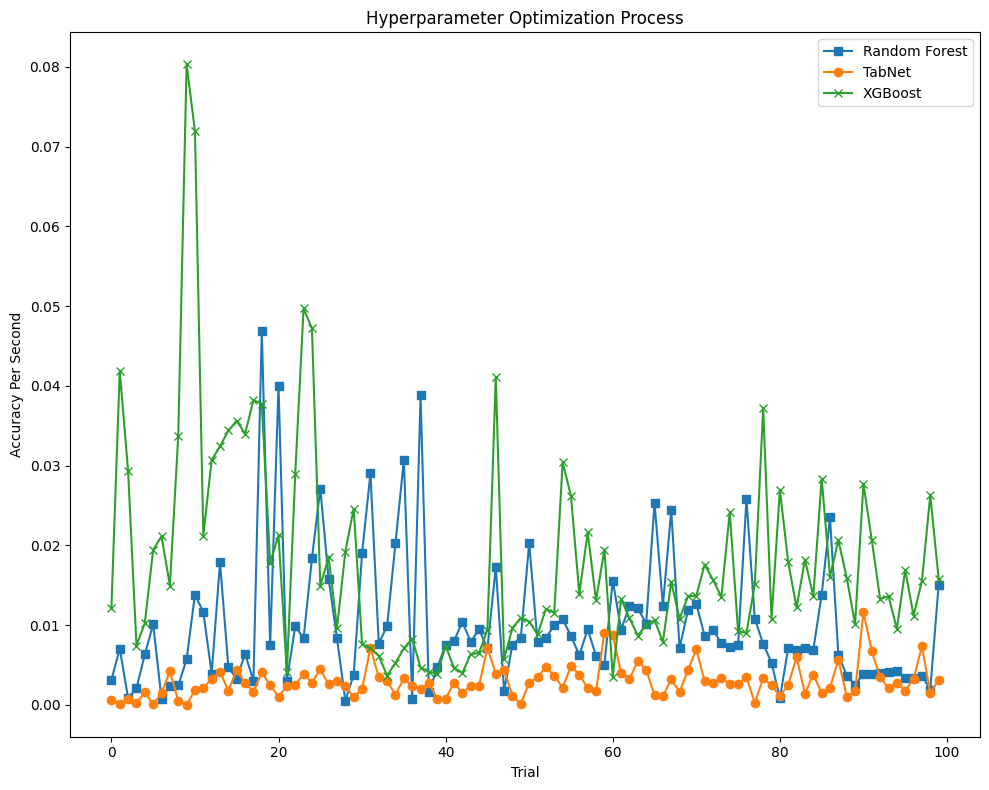

In [31]:
df_xgb['Efficiency'] = df_xgb['Accuracy'] / df_xgb['Duration']
df_tabnet['Efficiency'] = df_tabnet['Accuracy'] / df_tabnet['Duration']
df_rf['Efficiency'] = df_rf['Accuracy'] / df_rf['Duration']
plt.figure(figsize=(10, 8))
plt.plot(df_rf['Trial'], df_rf['Efficiency'], marker='s', linestyle='-', label='Random Forest')
plt.plot(df_tabnet['Trial'], df_tabnet['Efficiency'], marker='o', linestyle='-', label='TabNet')
plt.plot(df_xgb['Trial'], df_xgb['Efficiency'], marker='x', linestyle='-', label='XGBoost')
plt.xlabel('Trial')
plt.ylabel('Accuracy Per Second')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/hypertuning/EfficiencyPerTrialTabNetVs.XGBoostVs.RF.pdf', bbox_inches='tight', dpi=100)
plt.show()

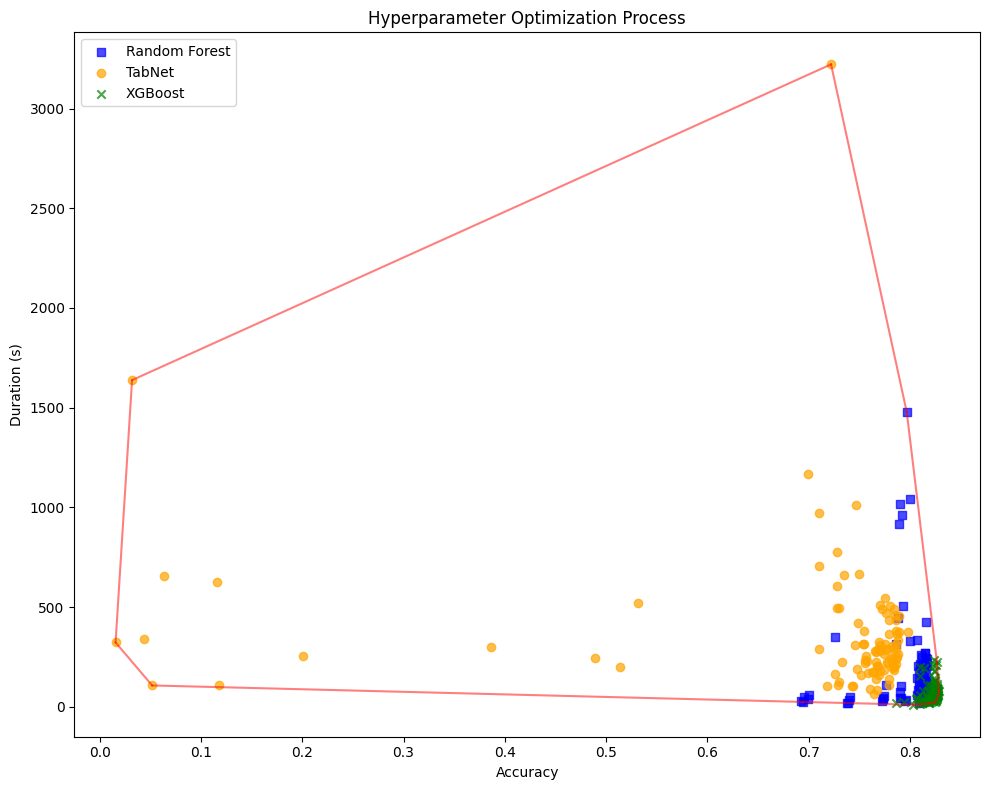

In [32]:
df_xgb['Model'] = 'XGBoost'
df_tabnet['Model'] = 'TabNet'
df_rf['Model'] = 'Random Forest'

combined = pd.concat([df_rf[['Accuracy', 'Duration', 'Model']], 
                      df_tabnet[['Accuracy', 'Duration', 'Model']],
                      df_xgb[['Accuracy', 'Duration', 'Model']]], axis=0).reset_index(drop=True)
points = combined[['Accuracy', 'Duration']].values
hull = ConvexHull(points)
plt.figure(figsize=(10, 8))
for model, color, mark in zip(['Random Forest', 'TabNet', 'XGBoost',], ['blue', 'orange', 'green'], ['s', 'o', 'x']):
    model_data = combined[combined['Model'] == model]
    plt.scatter(model_data['Accuracy'], model_data['Duration'], label=model, color=color, alpha=0.7, marker=mark)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='red', alpha=0.5)  
plt.xlabel('Accuracy')
plt.ylabel('Duration (s)')
plt.title('Hyperparameter Optimization Process')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures/hypertuning/ParetoFrontAccuracyVs.Duration.pdf', bbox_inches='tight', dpi=100)
plt.show()

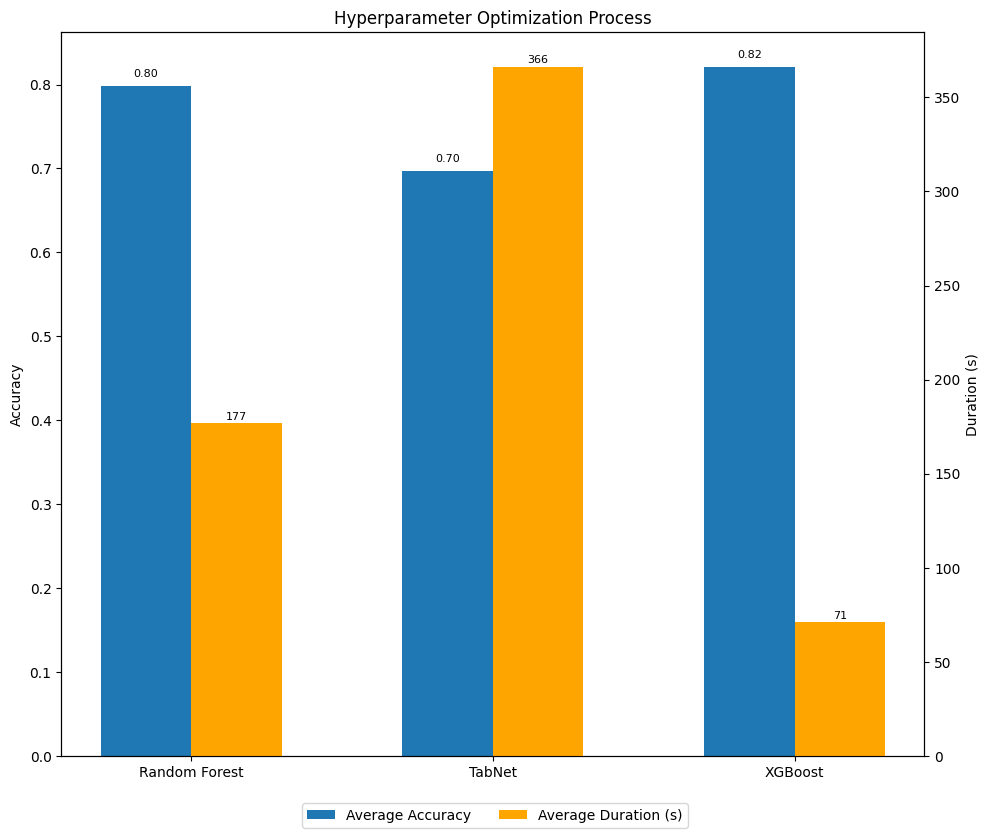

In [33]:
averages = combined.groupby('Model').mean()
models = averages.index
accuracy = averages['Accuracy']
duration = averages['Duration']

bar_width = 0.3
x = np.arange(len(models))
fig, ax1 = plt.subplots(figsize=(10, 8))
bars1 = ax1.bar(x - bar_width / 2, accuracy, width=bar_width, label='Average Accuracy')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=8)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width / 2, duration, width=bar_width, color='orange', label='Average Duration (s)')
ax2.set_ylabel('Duration (s)')
ax2.tick_params(axis='y')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.0f}', ha='center', fontsize=8)
plt.xticks(x, models)
plt.title('Hyperparameter Optimization Process')
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)  
plt.tight_layout()
plt.savefig('figures/hypertuning/AllComparisonOfAverageAccuracyAndTrainingTime.pdf', bbox_inches='tight', dpi=100)
plt.show()